In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from category_encoders import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
file_dir = 'C:\\Users\\User\\Desktop\\Data Projects\\Diamonds'
file_loc = 'diamonds.csv'

def join_path(directory:str, filename:str):
    return os.path.join(directory, filename)

path = join_path(file_dir, file_loc)
dmds = pd.read_csv(path)
dmds

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
## check for missing values
dmds.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [4]:
## check the data types of columns
dmds.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [5]:
## drop unwanted column
def drop_cols(df:pd.DataFrame, columns:list):
    return df.drop(columns=columns, axis=1)
## change data types to save on memory usage
def tweak_dtypes(df:pd.DataFrame):
    for column in df:
        if df[column].dtypes == 'float64':
            df[column] = df[column].astype('float16')
        elif df[column].dtypes == 'int64':
            df[column] = df[column].astype('int32')
        else:
            df[column] = df[column].astype('string')
    return df
## rename columns where necessary
def rename_cols(df:pd.DataFrame, name_dict:dict):
    return df.rename(columns=name_dict)

col_list = ['Unnamed: 0']
name_dict = {'x':'length', 'y':'width', 'z':'height'}



In [6]:
dmds = dmds.pipe(tweak_dtypes).pipe(rename_cols, name_dict).pipe(drop_cols, col_list)
dmds

,carat,cut,color,clarity,depth,table,price,length,width,height
0,0.229980,Ideal,E,SI2,61.50000,55.0,326,3.949219,3.980469,2.429688
1,0.209961,Premium,E,SI1,59.81250,61.0,326,3.890625,3.839844,2.310547
2,0.229980,Good,E,VS1,56.90625,65.0,327,4.050781,4.070312,2.310547
3,0.290039,Premium,I,VS2,62.40625,58.0,334,4.199219,4.230469,2.630859
4,0.310059,Good,J,SI2,63.31250,58.0,335,4.339844,4.351562,2.750000
...,...,...,...,...,...,...,...,...,...,...
53935,0.720215,Ideal,D,SI1,60.81250,57.0,2757,5.750000,5.761719,3.500000
53936,0.720215,Good,D,SI1,63.09375,55.0,2757,5.691406,5.750000,3.609375
53937,0.700195,Very Good,D,SI1,62.81250,60.0,2757,5.660156,5.679688,3.560547
53938,0.859863,Premium,H,SI2,61.00000,58.0,2757,6.148438,6.121094,3.740234


In [7]:
## let's split our data and keep the test set aside
train_set, test_set = train_test_split(dmds, test_size=0.2, random_state=42)

In [8]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43152 entries, 26546 to 15795
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43152 non-null  float16
 1   cut      43152 non-null  string 
 2   color    43152 non-null  string 
 3   clarity  43152 non-null  string 
 4   depth    43152 non-null  float16
 5   table    43152 non-null  float16
 6   price    43152 non-null  int32  
 7   length   43152 non-null  float16
 8   width    43152 non-null  float16
 9   height   43152 non-null  float16
dtypes: float16(6), int32(1), string(3)
memory usage: 2.0 MB


In [9]:
train_set.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,43152.0,0.797852,0.473389,0.199951,0.399902,0.700195,1.040039,5.011719
depth,43152.0,inf,1.429688,43.000000,61.000000,61.812500,62.500000,79.000000
table,43152.0,inf,2.230469,43.000000,56.000000,57.000000,59.000000,95.000000
price,43152.0,3939.490707,3990.000962,326.000000,956.000000,2401.000000,5354.250000,18818.000000
length,43152.0,inf,1.120117,0.000000,4.718750,5.699219,6.539062,10.742188
width,43152.0,inf,1.147461,0.000000,4.730469,5.710938,6.539062,58.906250
height,43152.0,inf,0.708008,0.000000,2.910156,3.529297,4.039062,31.796875


In [10]:
cat_dict = {
    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
    'cut': ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],
    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
            }

for key, value in cat_dict.items():
    print(key, value)

def order_categories(df:pd.DataFrame, category_dict:dict):
    for key, value in category_dict.items():
        df[key] = df[key].astype('category')
        df[key] = df[key].cat.set_categories(value, ordered=True)
    return df    

color ['J', 'I', 'H', 'G', 'F', 'E', 'D']
cut ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
clarity ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']


In [11]:
train_set = order_categories(df=train_set, category_dict=cat_dict)
train_set

<ipython-input-10-c92f269ec50e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key] = df[key].astype('category')
<ipython-input-10-c92f269ec50e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key] = df[key].cat.set_categories(value, ordered=True)


,carat,cut,color,clarity,depth,table,price,length,width,height
26546,2.009766,Good,F,SI2,58.09375,64.0,16231,8.226562,8.187500,4.769531
9159,1.009766,Very Good,E,SI2,60.00000,60.0,4540,6.570312,6.488281,3.919922
14131,1.099609,Premium,H,VS2,62.50000,58.0,5729,6.589844,6.539062,4.101562
15757,1.500000,Good,E,SI2,61.50000,65.0,6300,7.210938,7.171875,4.421875
24632,1.519531,Very Good,G,VS1,62.09375,57.0,12968,7.269531,7.320312,4.531250
...,...,...,...,...,...,...,...,...,...,...
11284,1.049805,Very Good,I,VS2,62.40625,59.0,4975,6.480469,6.511719,4.050781
44732,0.469971,Ideal,D,VS1,61.00000,55.0,1617,5.031250,5.011719,3.060547
38158,0.330078,Very Good,F,IF,60.31250,58.0,1014,4.488281,4.460938,2.699219
860,0.899902,Premium,J,SI1,62.81250,59.0,2871,6.128906,6.031250,3.820312


### Let's examine the distributions of the numerical columns

<AxesSubplot:xlabel='height', ylabel='Count'>

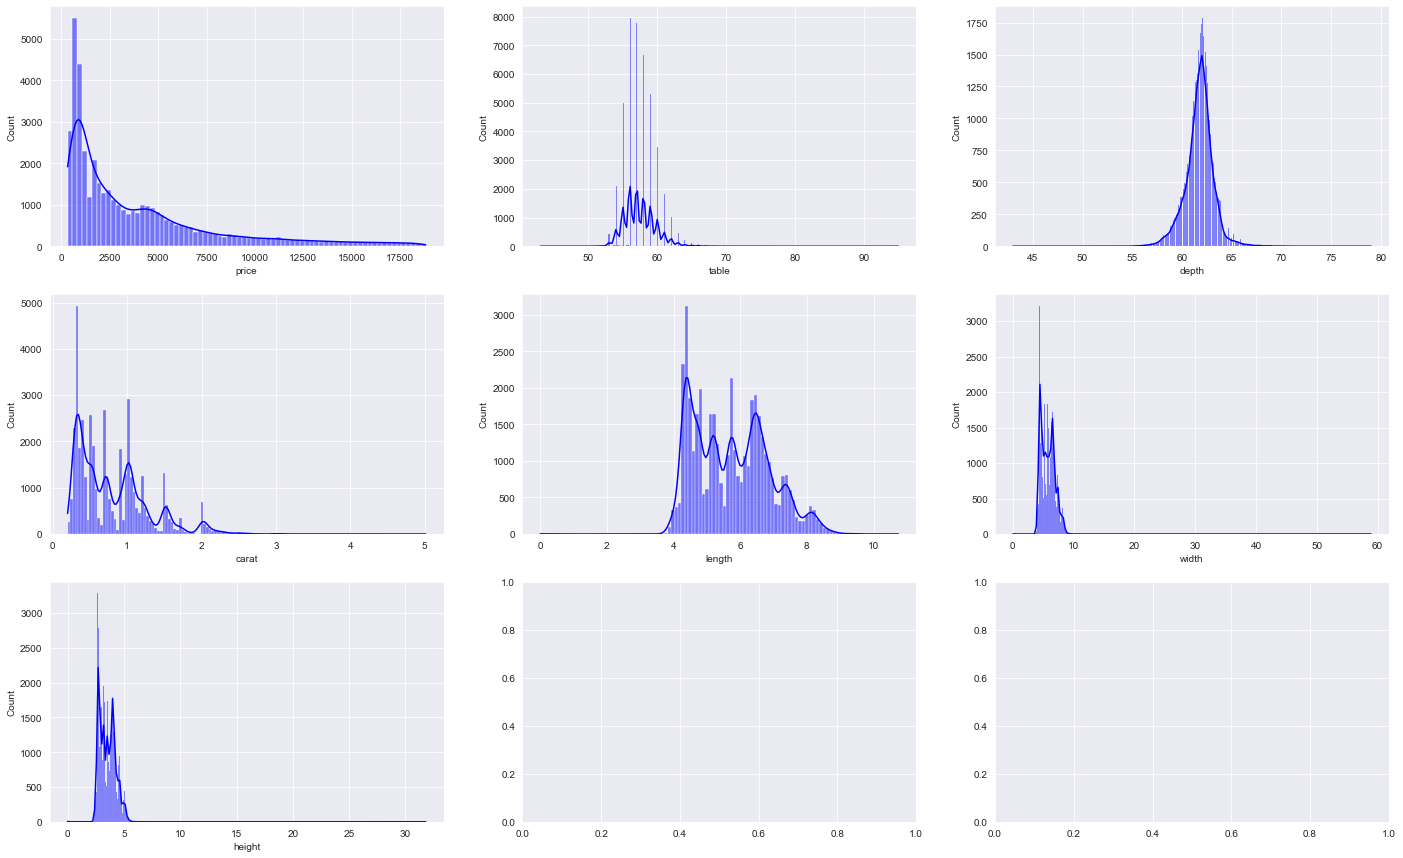

In [12]:
sns.set_style('darkgrid')
fig, axs = plt.subplots(3,3, figsize=(24,15))
sns.histplot(data=train_set, x='price', kde=True, color='blue', ax=axs[0,0])
sns.histplot(data=train_set, x='table', kde=True, color='blue', ax=axs[0,1])
sns.histplot(data=train_set, x='depth', kde=True, color='blue', ax=axs[0,2])
sns.histplot(data=train_set, x='carat', kde=True, color='blue', ax=axs[1,0])
sns.histplot(data=train_set, x='length', kde=True, color='blue', ax=axs[1,1])
sns.histplot(data=train_set, x='width', kde=True, color='blue', ax=axs[1,2])
sns.histplot(data=train_set, x='height', kde=True, color='blue', ax=axs[2,0])

### Insight:
- The 'price' column is skewed to the right with a bimodal distribution
- The 'depth' column is normally distributed
- The 'carat' and 'x' columns have a multimodal distribution

### Now let's check for outliers

Text(0.5, 1.0, 'Clarity of diamonds')

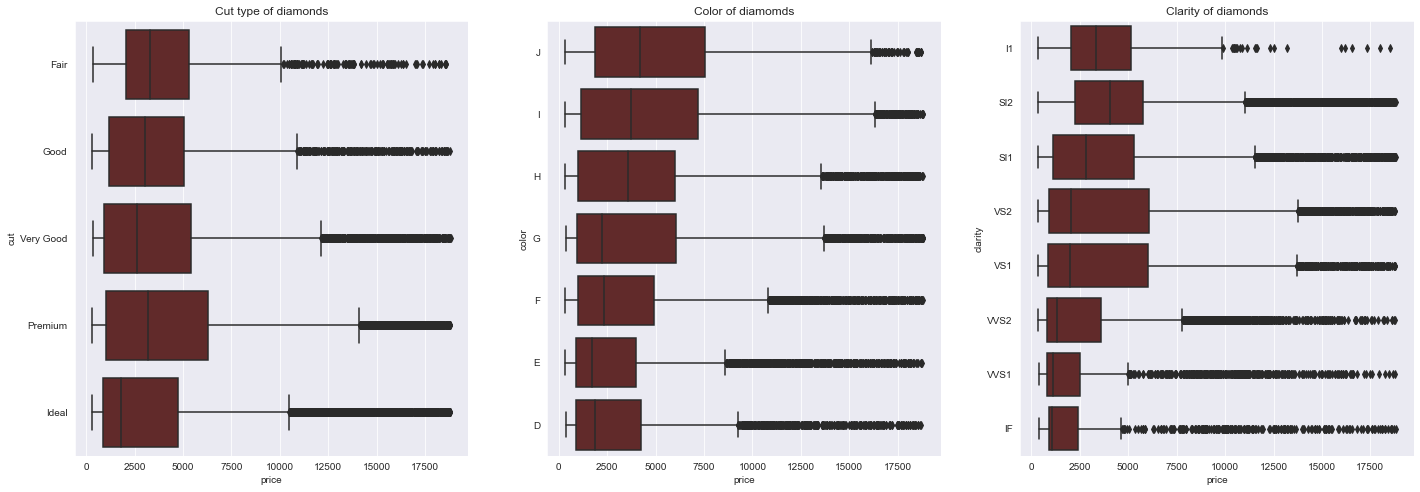

In [13]:
cat_vars = ['cut', 'color', 'clarity']

fig, axs = plt.subplots(1,3, figsize=(24,8))
for i, column in enumerate(cat_vars):
    sns.boxplot(data=train_set, x='price', y=column, ax=axs[i], color='darkred', saturation=0.4)
    

axs[0].set_title('Cut type of diamonds')
axs[1].set_title('Color of diamomds')
axs[2].set_title('Clarity of diamonds')


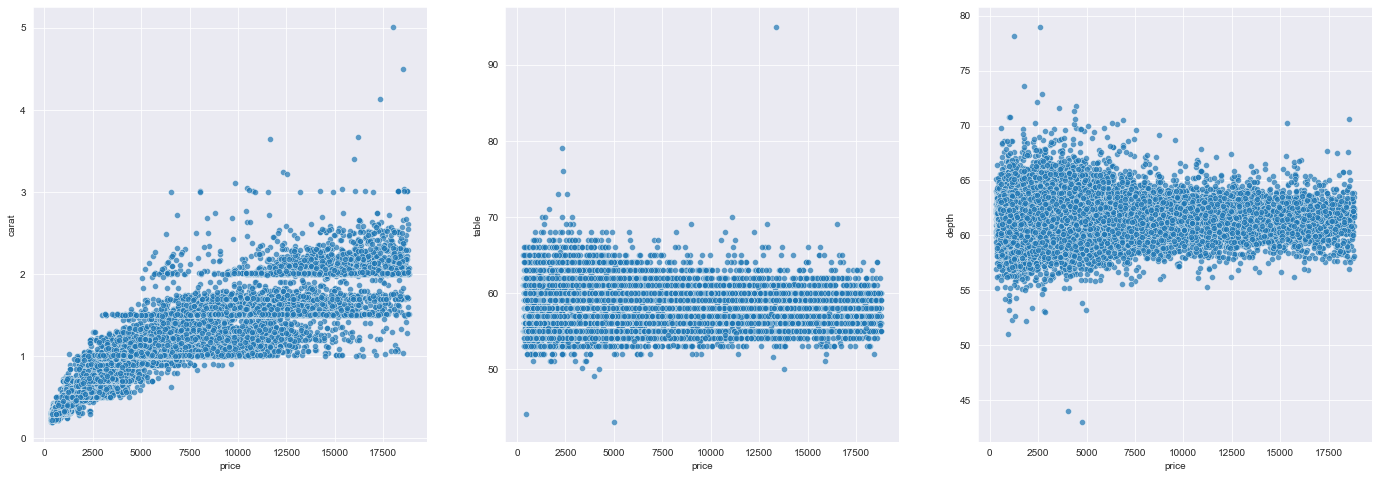

In [14]:
l1 = ['carat', 'table', 'depth']
l2 = ['length', 'width', 'height']
label = 'price'

fig, axs = plt.subplots(1,3, figsize=(24,8))
for i, col in enumerate(l1):
    sns.scatterplot(data=train_set, x=label, y=col, ax=axs[i], alpha=0.7)
    


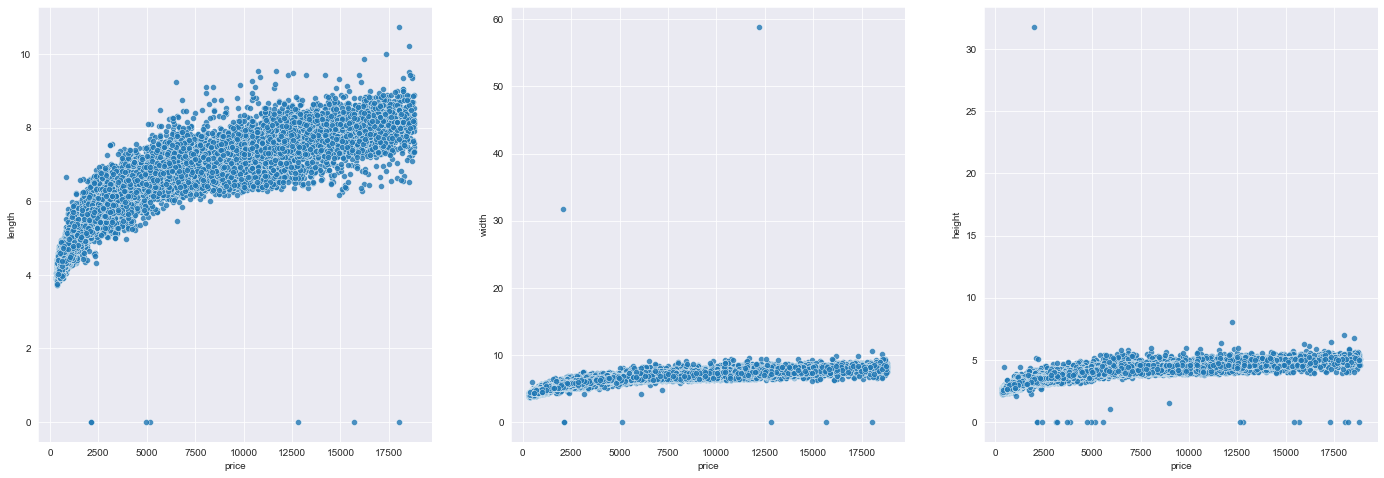

In [15]:
fig, axs = plt.subplots(1,3, figsize=(24,8))
for i, col in enumerate(l2):
    sns.scatterplot(data=train_set, x=label, y=col, ax=axs[i], alpha=0.8)

<AxesSubplot:>

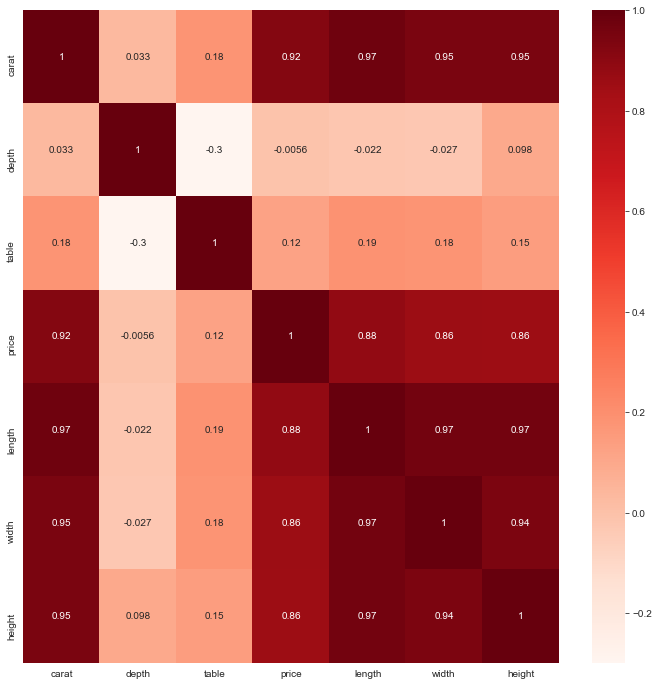

In [16]:
corr_mtx = train_set.corr()
num_cols = ['length', 'width', 'height', 'carat', 'depth', 'table']
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data=corr_mtx, annot=True, cmap='Reds', ax=ax)

The 'width' and 'height' columns are highly correlated to the 'length' column and will therefore be dropped to avoid multicollinearlity.

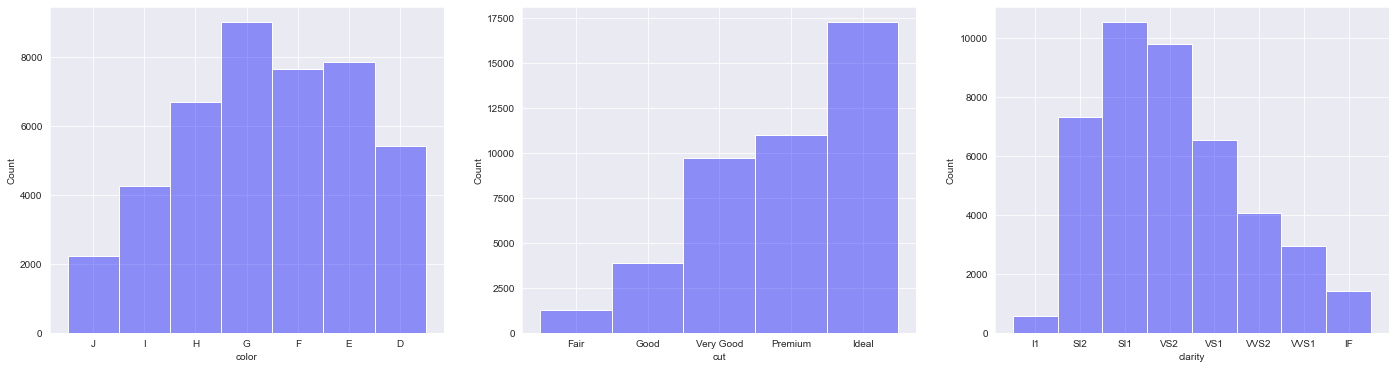

In [17]:
fig, axs = plt.subplots(1,3, figsize=(24,6))
for i, column in enumerate(['color', 'cut', 'clarity']):
    sns.histplot(data=train_set, x=column, color='blue', alpha=0.4, ax=axs[i])

#### Insight:
- 'Ideal' is the most popular cut type for diamonds purchased.
- 'SI2' and 'VS2' are the most popular clarity types for diamonds purchased.
- 'E' and 'G' are the most popular color grades among diamonds purchased 

In [18]:
train_set.clarity.unique()

['SI2', 'VS2', 'VS1', 'VVS1', 'SI1', 'IF', 'VVS2', 'I1']
Categories (8, object): ['I1' < 'SI2' < 'SI1' < 'VS2' < 'VS1' < 'VVS2' < 'VVS1' < 'IF']

In [19]:
from category_encoders import OrdinalEncoder
maplist = [
    {
        'col':'color',
        'mapping':{
            'J':0,
            'I':1,
            'H':2,
            'G':3,
            'F':4,
            'E':5,
            'D':6
        }
    },
    
    {
        'col':'cut',
        'mapping':{
            'Fair':0,
            'Good':1,
            'Very Good':2,
            'Premium':3,
            'Ideal':4
        }
    },
    
    {
        'col':'clarity',
        'mapping':{
            'I1':0,
            'SI2':1,
            'SI1':2,
            'VS2':3,
            'VS1':4,
            'VVS2':5,
            'VVS1':6,
            'IF':7
        }
    }
]




ord_encoder = OrdinalEncoder(mapping=maplist)
cat_train_set = ord_encoder.fit_transform(train_set[cat_vars])
cat_train_set


,cut,color,clarity
26546,1,4,1
9159,2,5,1
14131,3,2,3
15757,1,5,1
24632,2,3,4
...,...,...,...
11284,2,1,3
44732,4,6,4
38158,2,4,7
860,3,0,2


In [20]:
num_vars = ['carat', 'table', 'depth', 'length',]
num_train_set = train_set[num_vars]
true_price = train_set[label]

In [21]:
from sklearn.preprocessing import RobustScaler
r_scaler = RobustScaler().fit(X=num_train_set.copy())
df_scaled = pd.DataFrame(r_scaler.transform(num_train_set))
df_scaled.columns = num_vars

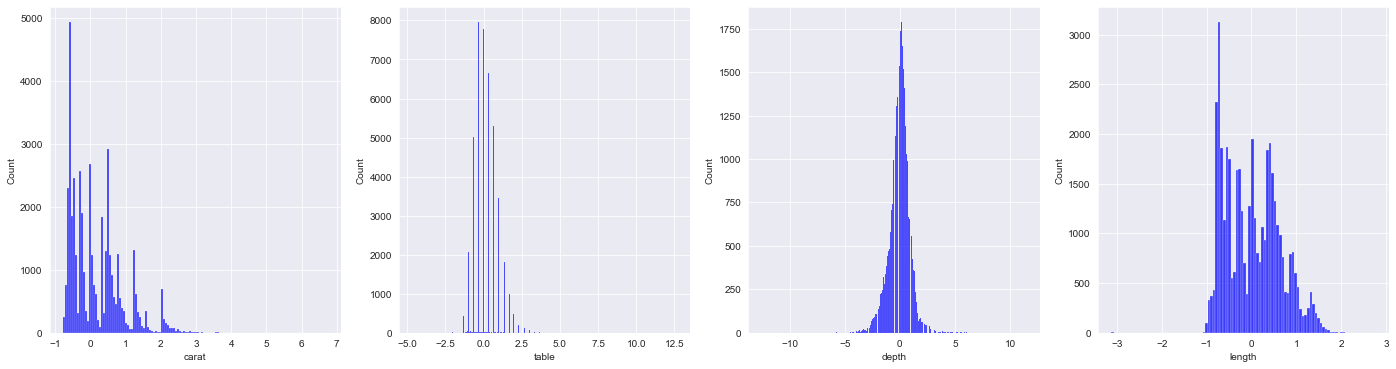

In [22]:
fig, axs = plt.subplots(1,4, figsize=(24,6))
for i, col in enumerate(num_vars):
    sns.histplot(data=df_scaled, x=col, color='Blue', ax=axs[i])

In [23]:
num_train_set.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,43152.0,0.797852,0.473389,0.199951,0.399902,0.700195,1.040039,5.011719
table,43152.0,inf,2.230469,43.000000,56.000000,57.000000,59.000000,95.000000
depth,43152.0,inf,1.429688,43.000000,61.000000,61.812500,62.500000,79.000000
length,43152.0,inf,1.120117,0.000000,4.718750,5.699219,6.539062,10.742188


In [24]:
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,43152.0,0.153076,0.739746,-0.781250,-0.468994,0.0,0.530762,6.738281
table,43152.0,0.153076,0.742676,-4.667969,-0.333252,0.0,0.666504,12.664062
depth,43152.0,-0.046204,0.952148,-12.539062,-0.541504,0.0,0.458252,11.460938
length,43152.0,0.018356,0.615234,-3.130859,-0.538574,0.0,0.461426,2.769531


In [25]:
full_pipeline = ColumnTransformer([
    ('r_scaler', RobustScaler(), num_vars),
    ('ord_encoder', OrdinalEncoder(mapping=maplist), cat_vars)
    ])

In [26]:
ready_train = full_pipeline.fit_transform(train_set)

In [27]:
l_reg = LinearRegression()
## fit your X,y to the regression algorithm
l_reg.fit(ready_train, true_price)
l_reg_price_pred = l_reg.predict(ready_train)

In [28]:
def normalize_rmse(y_observed, y_pred):
    rmse = np.sqrt(mean_squared_error(y_observed, y_pred))
    norm_rmse = rmse/(y_observed.max() - y_observed.min())
    print(f"RMSE: ${rmse}")
    print(f"normalized RMSE: {norm_rmse}")


In [29]:
normalize_rmse(y_observed=true_price, y_pred=l_reg_price_pred)

RMSE: $1214.7136947600072
normalized RMSE: 0.06568860560025996


In [30]:
from sklearn.ensemble import RandomForestRegressor
randf_reg = RandomForestRegressor()
randf_reg.fit(ready_train, true_price)
randfreg_price_pred = randf_reg.predict(ready_train)

normalize_rmse(y_observed=true_price, y_pred=randfreg_price_pred)

RMSE: $206.01281728037878
normalized RMSE: 0.011140645537550226


- This is quite an improvement in RMSE in comparison to the baseline simple regression model

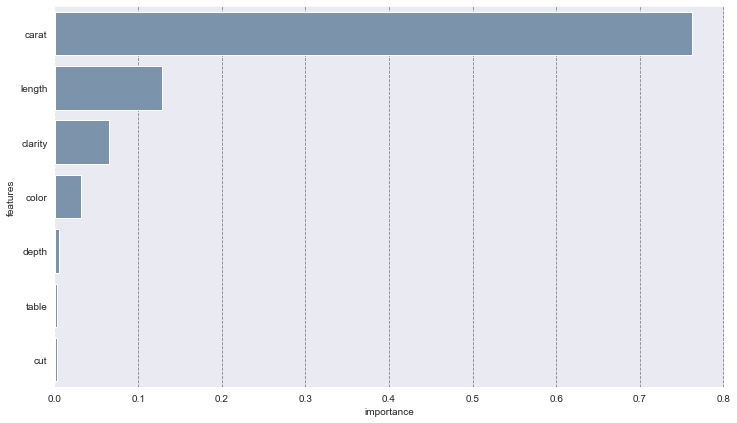

In [31]:
feature_importance = randf_reg.feature_importances_
features = num_vars+cat_vars

dict = {
    'features':features,
    'importance':feature_importance
}

## a dataframe containing the training sets' features and their importance
importance_df = pd.DataFrame(dict).sort_values(by='importance', ascending=False)
fig, ax = plt.subplots(figsize=(12,7))
sns.barplot(data=importance_df, x='importance', y='features', palette=['#7393B3'])
ax.grid(visible=True, axis='x', linestyle='--', color='grey')


#### Insights:
- *carat* size is the most important numeric feature in the predicting diamond prices in this dataset.
- Diamond *clarity* is the most important qualitative attribute when predicting diamond prices in this dataset.

In [32]:
from sklearn.model_selection import cross_val_score
def display_cv_scores(X, y, model, batches=10):
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=batches)
    rmse_scores = np.sqrt(-scores)
    print(f"RMSE scores:{rmse_scores}")
    print(f"mean rmse score:{np.mean(rmse_scores)}")

In [33]:
display_cv_scores(X=ready_train, y=true_price, model=l_reg)

RMSE scores:[1149.15618245 1207.08956559 1277.43472362 1199.29116489 1295.92417063
 1220.38994973 1200.96454779 1181.27393589 1202.95412503 1213.33196517]
mean rmse score:1214.781033078473


In [34]:
display_cv_scores(X=ready_train, y=true_price, model=randf_reg)

RMSE scores:[532.08195018 519.79670691 597.27153024 576.09799046 568.01129347
 526.42857566 580.25869628 529.50747393 558.91856438 557.50918213]
mean rmse score:554.5881963645613


In [37]:
from sklearn import ensemble
reg_GB = ensemble.GradientBoostingRegressor()
reg_GB.fit(X=ready_train, y=true_price)
normalize_rmse(y_observed=true_price, y_pred=reg_GB.predict(ready_train))

RMSE: $617.5830635385911
normalized RMSE: 0.03339731037954743


In [38]:
display_cv_scores(X=ready_train, y=true_price, model=reg_GB)

RMSE scores:[609.2222741  607.37695438 663.4618499  631.41132743 635.49658407
 638.8606023  645.94139365 600.92613316 627.0607483  626.72306333]
mean rmse score:628.6480930643442


In [39]:
y_test = test_set[label]
ready_test = full_pipeline.transform(test_set)
y_test_pred = reg_GB.predict(ready_test)
normalize_rmse(y_observed=y_test, y_pred=y_test_pred)

RMSE: $625.1556392405448
normalized RMSE: 0.0338141302055682


In [40]:
train_scores = []
test_scores =[]
models = {'linear_reg':LinearRegression(),
          'randomforest_reg':RandomForestRegressor(),
          'GB_reg':ensemble.GradientBoostingRegressor()}
for key, algorithm in models.items():
    algorithm.fit(ready_train, true_price)
    price_pred = algorithm.predict(ready_train)
    train_score = np.sqrt(mean_squared_error(y_true=true_price, y_pred=price_pred))
    train_scores.append(train_score)
    
    test_price_pred = algorithm.predict(ready_test)
    test_score = np.sqrt(mean_squared_error(y_true=y_test, y_pred=test_price_pred))
    test_scores.append(test_score)
    
rmse_dict = {
    
    'algorithm':list(models.keys()),
    'train_score':train_scores,
    'test_score':test_scores
    
    }


rmse_df = pd.DataFrame(rmse_dict)
rmse_df
rmse_df.to_csv('RMSE scores.csv')

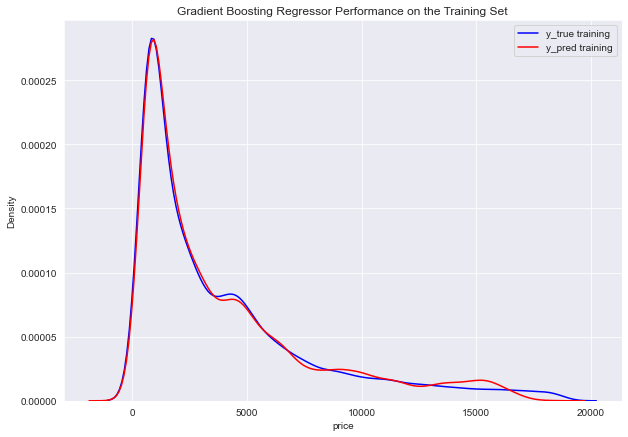

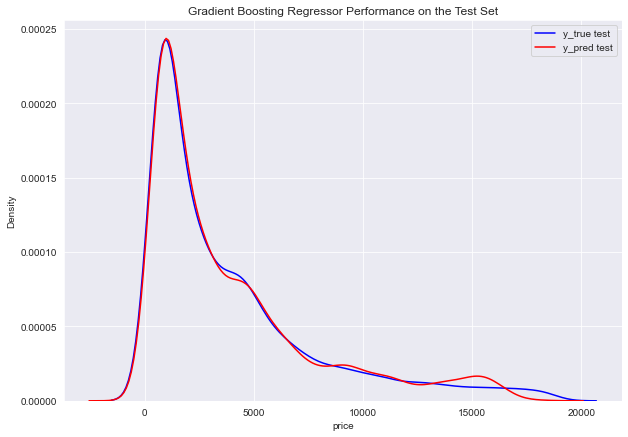

In [42]:
fig, ax = plt.subplots(figsize=(10,7))

sns.kdeplot(true_price, color='Blue', label='y_true training')
sns.kdeplot(reg_GB.predict(ready_train), color='Red', label='y_pred training')
plt.title('Gradient Boosting Regressor Performance on the Training Set')
plt.legend()


fig, ax = plt.subplots(figsize=(10,7))
sns.kdeplot(y_test, color='Blue', label='y_true test')
sns.kdeplot(reg_GB.predict(ready_test), color='Red', label='y_pred test')
plt.title('Gradient Boosting Regressor Performance on the Test Set')
plt.legend()
